In [1]:
import pandas as pd
import json
import numpy as np
from villes import Ville
from collections import Counter
import matplotlib.pyplot as plt
from unidecode import unidecode

In [172]:
postes_df = pd.read_excel('config/ponderation.xlsx', sheet_name='postes')
postes_df.rename(columns={'TJ': 'Ville', 'Places disponibles': 'Postes'}, inplace=True)
postes_df.to_csv('./config/ponderation.csv', index=False)

In [131]:
sondage_df = pd.read_csv('config/sondage.csv')
sondage_df.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,auditeur_id
0,Arras,Valenciennes,Lille,Cambrai,Béthune,Avesnes-sur-Helpe,Boulogne sur mer,Dunkerque,Houbron DImitri
1,Bayonne,Dax,Libourne,Mont-de-Marsan,Pau,Bordeaux,Périgueux,Tarbes,Berthière Clara
2,GRASSE,DRAGUIGNAN,AVIGNON,BASTIA,AJACCIO,AIX-EN-PROVENCE,MONTPELLIER,PERPIGNAN,MARDINI DANIA
3,Toulouse,Auch,Foix,Montauban,Carcassonne,Albi,Bayonne,Bordeaux,RIVIERE Alexandra
4,TOULOUSE,BORDEAUX,LIBOURNE,NARBONNE,CASTRES,RODEZ,AGEN,CARCASSONE,DARBON Louise


In [132]:
def clean_names(name):
    replacements = {'BEAUVAIS': 'BEAUVAIX', 'AIX': 'AIX-EN-PROVENCE', 'BEZIER': 'BEZIERS', 'AUCH': 'AUCHE', 'CHARTES': 'CHARTRES', 'PERIGEUX': 'PERIGUEUX', 'STASBOURG': 'STRASBOURG', 'CARCASSONE': 'CARCASSONNE', 'TOULOU': 'TOULOUSE', 'SAINTE': 'SAINTES', 'VALENCIENNE':'VALENCIENNES', 
                    'BENSANCON':'BESANCON', 'CLERMON-FERRAND': 'CLERMONT-FERRAND', 'BRIVES-LA-GAILLARDE': 'BRIVE-LA-GAILLARDE', 'LAROCHELLE': 'LA ROCHELLE',
                    'SAINT-BRIEUX': 'SAINT-BRIEUC', 'AMIEN': 'AMIENS', 'LES SABLES-D-OLONNE': "LES SABLES-D'OLONNE", 'ANNCEY': 'ANNECY',
                    'VILLEFRANCE-SUR-SAONE': 'VILLEFRANCHE-SUR-SAONE', 'THONONS-LES-BAINS': 'THONON-LES-BAINS'
                    }
    name = unidecode(name).upper().strip()
    if name[:3] == 'TJ ' or name[:3] == 'TJ-':
        name = name[3:]
    if name[:3] == 'ST ' or name[:3] == 'ST-':
        name = 'SAINT-' + name[3:]
    if (name[:2] == 'LA' or name[:2] == 'LE') and name[2] == '-':
        name = name[:2] + ' ' + name[3:]
    if name[:3] == 'LES' and name[3] == '-':
        name = name[:3] + ' ' + name[4:]
    name_list = name.split()
    if len(name_list) >= 2:
        if name_list[0] not in ['LES', 'LA', 'LE']:
            name = name.replace(' ', '-')
        else:
            name = name_list[0] + ' ' + '-'.join(name_list[1:])
    try:
        name = replacements[name]
    except:
        pass
    return name
    

In [133]:
sondage_df = sondage_df.map(clean_names)

In [167]:
villes = postes_df['TJ'].unique()
for ville in sondage_df['v_8'].unique():
    if ville not in villes:
        print(ville)

In [158]:
villes_a_supprimer = ['VERDUN', 'CHAUMONT', 'SAINT-QUENTIN', 'FONTAINEBLEAU', 'DIGNE', 'SENS']
filter = sondage_df['v_1'].isin(villes_a_supprimer) | sondage_df['v_2'].isin(villes_a_supprimer) | sondage_df['v_3'].isin(villes_a_supprimer) | sondage_df['v_4'].isin(villes_a_supprimer) | sondage_df['v_5'].isin(villes_a_supprimer) | sondage_df['v_6'].isin(villes_a_supprimer) | sondage_df['v_7'].isin(villes_a_supprimer) | sondage_df['v_8'].isin(villes_a_supprimer)
sondage_df = sondage_df.drop(sondage_df[filter].index).reset_index(drop=True)
sondage_df

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,auditeur_id
0,ARRAS,VALENCIENNES,LILLE,CAMBRAI,BETHUNE,AVESNES-SUR-HELPE,BOULOGNE-SUR-MER,DUNKERQUE,HOUBRON-DIMITRI
1,BAYONNE,DAX,LIBOURNE,MONT-DE-MARSAN,PAU,BORDEAUX,PERIGUEUX,TARBES,BERTHIERE-CLARA
2,GRASSE,DRAGUIGNAN,AVIGNON,BASTIA,AJACCIO,AIX-EN-PROVENCE,MONTPELLIER,PERPIGNAN,MARDINI--DANIA
3,TOULOUSE,AUCHE,FOIX,MONTAUBAN,CARCASSONNE,ALBI,BAYONNE,BORDEAUX,RIVIERE-ALEXANDRA
4,TOULOUSE,BORDEAUX,LIBOURNE,NARBONNE,CASTRES,RODEZ,AGEN,CARCASSONNE,DARBON-LOUISE
...,...,...,...,...,...,...,...,...,...
437,PAU,AGEN,POITIERS,MONTAUBAN,ALBI,MONTPELLIER,PERPIGNAN,NARBONNE,HERR-MATHIEU
438,AGEN,BORDEAUX,VERSAILLES,MONTAUBAN,ANGOULEME,BERGERAC,CHARTRES,NANTERRE,MAMPIANINA-TONIA-FIONAH
439,MARSEILLE,AJACCIO,BASTIA,MONT-DE-MARSAN,BAYONNE,TOURS,PARIS,BORDEAUX,PHENIX-AURORE
440,VERSAILLES,PONTOISE,EVRY,MELUN,CHARTRES,AMIENS,LE MANS,EVREUX,MERY-BERTILLE


In [182]:
sondage_df = pd.read_csv('config/sondage.csv')
sondage_df = sondage_df[['id_auditeur'] + [f'v_{i}' for i in range(1,8)]]
sondage_df.to_csv('config/sondage_7.csv', index=False)

In [177]:
sondage_df = sondage_df[['id_auditeur'] + [f'v_{i}' for i in range(1,9)]]
sondage_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8
0,HOUBRON-DIMITRI,ARRAS,VALENCIENNES,LILLE,CAMBRAI,BETHUNE,AVESNES-SUR-HELPE,BOULOGNE-SUR-MER,DUNKERQUE
1,BERTHIERE-CLARA,BAYONNE,DAX,LIBOURNE,MONT-DE-MARSAN,PAU,BORDEAUX,PERIGUEUX,TARBES
2,MARDINI--DANIA,GRASSE,DRAGUIGNAN,AVIGNON,BASTIA,AJACCIO,AIX-EN-PROVENCE,MONTPELLIER,PERPIGNAN
3,RIVIERE-ALEXANDRA,TOULOUSE,AUCHE,FOIX,MONTAUBAN,CARCASSONNE,ALBI,BAYONNE,BORDEAUX
4,DARBON-LOUISE,TOULOUSE,BORDEAUX,LIBOURNE,NARBONNE,CASTRES,RODEZ,AGEN,CARCASSONNE


In [110]:
params_dict = {'Voeux max': 6, 'Noires max': 2, 'Noires ou rouges max': 4, 'Vertes min': 0}

In [11]:
# with open('config/parametres_refactor.json', 'w') as fp:
#     json.dump(params_dict, fp)

In [4]:
sond_df = pd.read_csv('config/sondage_refactor.csv')
sond_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6
0,1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER
1,2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL
2,3,BASTIA,BAYONNE,BEZIERS,SAINT-NAZAIRE,PERPIGNAN,DUNKERQUE
3,4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY
4,5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND


In [13]:
# sond_df.to_csv('config/sondage_refactor.csv', index=False)
sond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_auditeur  303 non-null    int64 
 1   v_1          303 non-null    object
 2   v_2          303 non-null    object
 3   v_3          303 non-null    object
 4   v_4          303 non-null    object
 5   v_5          303 non-null    object
 6   v_6          303 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.7+ KB


In [23]:
sond2 = sond_df.copy()
sond2.set_index('id_auditeur', inplace=True)
sond2.loc[3, [f'v_{i}' for i in range(4, sond2.shape[1]+1)]] = np.nan
sond2.head()
# sond2.reset_index(inplace=True)
sond3_df = sond2.sample(frac=1, random_state = 42).reset_index()

In [13]:
sond3_df.iloc[0, 6] = np.nan
sond3_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6
0,180,LILLE,LE HAVRE,STRASBOURG,PARIS,NANCY,NaN
1,229,MARSEILLE,AIX-EN-PROVENCE,MONTPELLIER,TOULOUSE,PERPIGNAN,PAU
2,112,CRETEIL,MARSEILLE,TOULOUSE,LYON,NANCY,BEAUVAIS
3,247,PARIS,LILLE,STRASBOURG,TOULOUSE,SAINT-NAZAIRE,BOULOGNE-SUR-MER
4,61,BREST,LORIENT,QUIMPER,SAINT-NAZAIRE,CLERMONT-FERRAND,BAYONNE


In [19]:
sond3_df.loc[0, 'id_auditeur']

np.int64(180)

In [38]:
sond2['assignation'] = ''
sond2['voeu_realise'] = np.nan
sond2.loc[2, 'assignation'] = 'PARIS'
sond2.head()

,v_1,v_2,v_3,v_4,v_5,v_6,assignation,voeu_realise
id_auditeur,,,,,,,,
1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER,,NaN
2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL,PARIS,NaN
3,BASTIA,BAYONNE,BEZIERS,NaN,NaN,NaN,,NaN
4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY,,NaN
5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND,,NaN


In [47]:
test = sond2.loc[3][:-2].values
np.where(test == 'PARIS')[0]

array([], dtype=int64)

In [17]:
for index, row in sond3_df.head().iterrows():
    aud = row['id_auditeur']
    print(len(row[1:].dropna()))

5
6
6
6
6


In [62]:
cas_part_df = pd.read_csv('config/cas_particuliers.csv')
cas_part_df.head()

,id_auditeur,v_max
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6


In [63]:
cas_part_df.loc[cas_part_df['id_auditeur'] == 3, 'v_max'] = 10
cas_part_df.head()

,id_auditeur,v_max
0,1,6
1,2,6
2,3,10
3,4,6
4,5,6


In [64]:
cas_part_df[['id_auditeur', 'v_max']].sum(axis=1)

0        7
1        8
2       13
3       10
4       11
      ... 
298    305
299    306
300    307
301    308
302    309
Length: 303, dtype: int64

In [16]:
# cas_part_df.to_csv('config/cas_part.csv', index=False)

In [11]:
res = pd.read_csv('resultats/resultats.csv')
res.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6,assignation,voeu_realise
0,1,ARRAS,SAINT-QUENTIN,BEAUVAIS,COMPIEGNE,BETHUNE,BOULOGNE-SUR-MER,SAINT-QUENTIN,2
1,2,CHALON-SUR-SAONE,MONTBELIARD,LONS-LE-SAUNIER,COLMAR,CHALONS-EN-CHAMPAGNE,VESOUL,LONS-LE-SAUNIER,3
2,3,BASTIA,BAYONNE,BEZIERS,SAINT-NAZAIRE,PERPIGNAN,DUNKERQUE,BEZIERS,3
3,4,BOBIGNY,CRETEIL,PONTOISE,EVRY,BEAUVAIS,NANCY,BEAUVAIS,5
4,5,MARSEILLE,LYON,TOULOUSE,CHARTRES,PAU,CLERMONT-FERRAND,LYON,2


<Axes: ylabel='count'>

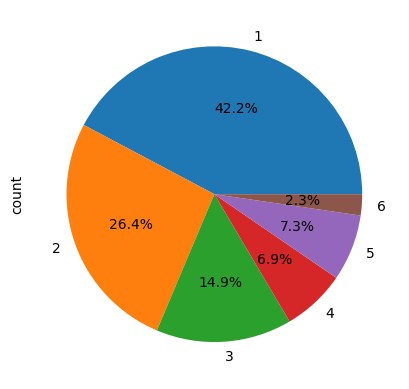

In [2]:
res = pd.read_csv('resultats/resultats.csv')
res['voeu_realise'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

In [46]:
res[res['voeu_realise'] == 1]['assignation'].value_counts()

assignation
MARSEILLE     7
NANTERRE      5
ANGERS        4
TOULON        4
STRASBOURG    4
             ..
BASTIA        1
BAYONNE       1
MELUN         1
BETHUNE       1
DUNKERQUE     1
Name: count, Length: 70, dtype: int64

In [5]:
100 * res['voeu_realise'].value_counts().sort_index()[:3].sum() / res['voeu_realise'].value_counts().sort_index().sum()

np.float64(83.4983498349835)

In [4]:
res['voeu_realise'].value_counts().sort_index().loc[1:3]

voeu_realise
1    128
2     80
3     45
Name: count, dtype: int64

In [14]:
dis = pd.read_csv('resultats/distribution_voeux.csv')
dis.head()

,Ville,Postes,Couleur,nombre_voeux_1,nombre_voeux_2,nombre_voeux_3,nombre_voeux_4,nombre_voeux_5,nombre_voeux_6,nombre_voeux_7,total_demandes
0,AGEN,2,noir,1.0,6.0,2.0,1.0,NaN,NaN,NaN,10.0
1,AIX-EN-PROVENCE,1,noir,2.0,5.0,6.0,1.0,NaN,NaN,NaN,14.0
2,AJACCIO,1,noir,3.0,2.0,NaN,1.0,NaN,NaN,NaN,6.0
3,ALBERTVILLE,1,vert,NaN,NaN,NaN,1.0,NaN,3.0,NaN,4.0
4,ALBI,2,vert,2.0,NaN,NaN,2.0,2.0,3.0,NaN,9.0


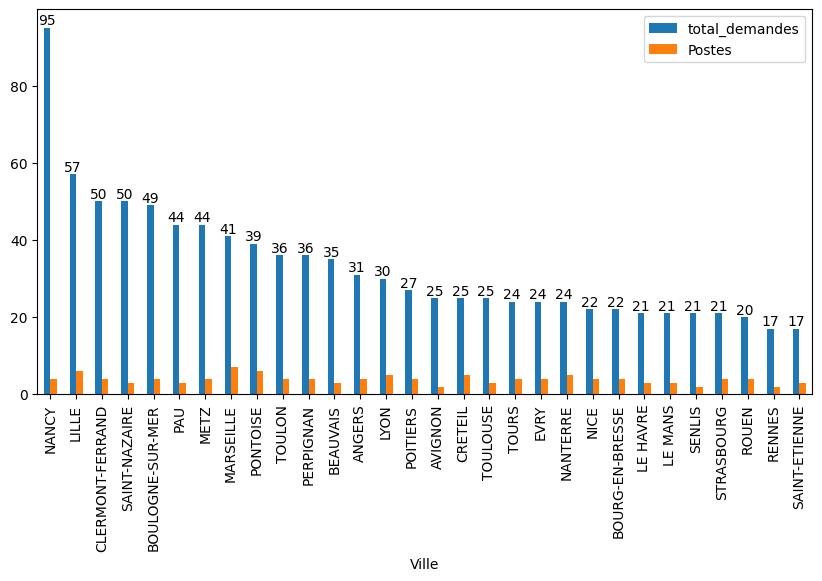

In [7]:
ax = dis.sort_values(by='total_demandes', ascending=False).set_index('Ville').head(30)[['total_demandes', 'Postes']].plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()

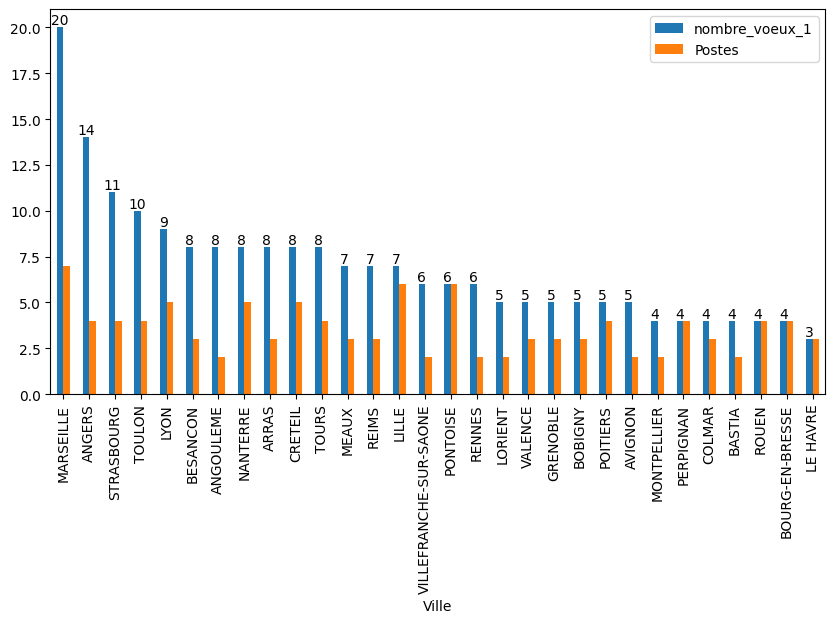

In [8]:
ax = dis.sort_values(by='nombre_voeux_1', ascending=False).set_index('Ville').head(30)[['nombre_voeux_1', 'Postes']].plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()

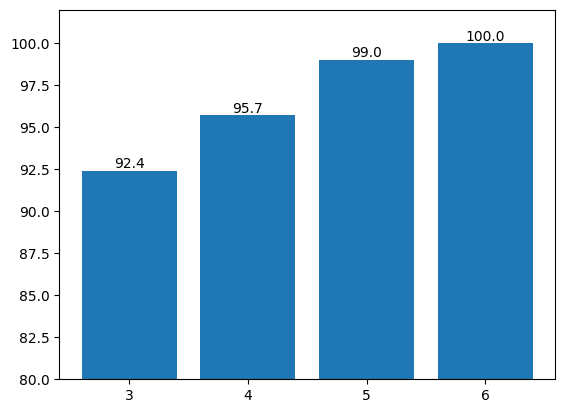

In [45]:
nb_auditeurs = 303
assignment_rates = {}
for nb_voeux in range(3,7):
    cols = [f'nombre_voeux_{i}' for i in range(1, nb_voeux+1)]
    rate = min(100 * dis.dropna(how='all', subset=cols)['Postes'].sum() / nb_auditeurs, 100)
    assignment_rates[nb_voeux] = rate
fig, ax = plt.subplots()
bar_container = ax.bar(range(len(assignment_rates)), list(assignment_rates.values()), align='center')
ax.bar_label(bar_container, fmt='{:,.1f}')
plt.xticks(range(len(assignment_rates)), list(assignment_rates.keys()))
plt.ylim(80,102)
plt.show()

In [23]:
dis['Postes'].sum()

np.int64(309)

In [2]:
postes_df = pd.read_csv('../fichiers_2024/postes_ponderes.csv')
postes_df.head()

,Ville,Postes,Couleur
0,AGEN,4,noir
1,AIX-EN-PROVENCE,6,noir
2,NICE,5,noir
3,TOULON,5,noir
4,AMIENS,3,noir


In [4]:
results_df = pd.read_csv('../app/resultats/resultats_voeux_contraints_6_2024_linéaire.csv')
results_df.head()

,id_auditeur,v_1,v_2,v_3,v_4,v_5,v_6,assignation,voeu_realise
0,AGNES ANTOINE,PAU,BAYONNE,AGEN,TARBES,MONT-DE-MARSAN,LES SABLES-D'OLONNE,PAU,1
1,AIME CAMILLE,MARSEILLE,MONTPELLIER,TOULOUSE,AIX-EN-PROVENCE,GRENOBLE,TARASCON,MONTPELLIER,2
2,ALUZE JULIETTE,BOBIGNY,LA ROCHELLE,LYON,NANTERRE,CRETEIL,NANTES,LYON,3
3,ANDRE DE LA FRESNAYE ROXANE,NICE,AIX-EN-PROVENCE,TOULON,MARSEILLE,PARIS,CRETEIL,NICE,1
4,ANDRIVON INES,ANNECY,NICE,BAYONNE,GRENOBLE,NANCY,BREST,ANNECY,1


In [5]:
assignations = Counter(results_df['assignation'])

In [6]:
postes_df['assignation'] = postes_df['Ville'].apply(lambda x: assignations[x])

In [19]:
postes_df['Postes libres'] = postes_df['Postes'] - postes_df['assignation']

In [25]:
postes_libres = postes_df[postes_df['Postes libres'] > 0]
postes_libres.head()

,Ville,Postes,Couleur,assignation,Postes libres
98,SOISSONS,1,vert,0,1
99,BELFORT,1,vert,0,1
102,NEVERS,2,vert,1,1
103,ALENCON,2,vert,0,2
104,ARGENTAN,1,vert,0,1


In [26]:
postes_libres = postes_libres[['Ville', 'Postes', 'Postes libres']].rename(columns={'Ville': 'TJ', 'Postes': 'Nombre total de postes', 'Postes libres': 'Postes restants'})
postes_libres.head()

,TJ,Nombre total de postes,Postes restants
98,SOISSONS,1,1
99,BELFORT,1,1
102,NEVERS,2,1
103,ALENCON,2,2
104,ARGENTAN,1,1


In [27]:
postes_libres.to_csv('postes_restants.csv', index=False)

In [15]:
results_finaux = results_df[['id_auditeur', 'assignation']].rename(columns = {'id_auditeur': 'NOM PRÉNOM', 'assignation': 'TJ'})
results_finaux.sort_values(by='NOM PRÉNOM')
results_finaux.to_csv('resultats_finaux_affectations_stage_juridictionnel_2024.csv', index=False)